# DIVP LAB 3
### Name: Aniket Raut
### Roll no. : 22
### Batch: B2

#### **Aim**: To study and perform point-point processing operation used in image enhancement.
1. Digital negative
2. Bit Plane Slicing
3. Gray Level Slicing
4. Gamma-factor Transformation
5. Log Transformation
6. Contrast stretching
7. Thresholding

In [ ]:
# Importing Libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt

In [ ]:
# Loading Images
cameraman = cv2.imread('/content/cameraman.jpg')
leena = cv2.imread('/content/LenaB&W.jpg')
mri = cv2.imread('/content/mri.jpg')
planet = cv2.imread('/content/planet.jpg')
xray = cv2.imread('/content/xray.jpg')

## 1) Digital Negative

In [ ]:
def generate_digital_negative(img):
  print("Original Image")
  cv2_imshow(img)
  negative = 255 - img
  print("Digital Negative")
  cv2_imshow(negative)

In [ ]:
generate_digital_negative(cameraman)

Original Image


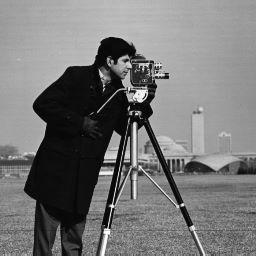

Digital Negative


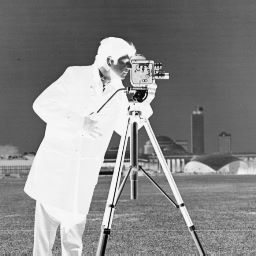

Original Image


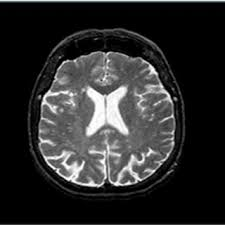

Digital Negative


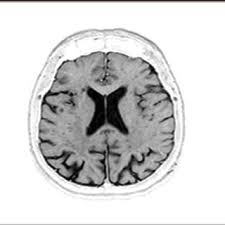

In [ ]:
generate_digital_negative(mri)

In [ ]:
generate_digital_negative(leena)

Original Image


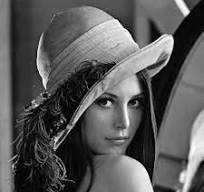

Digital Negative


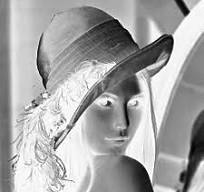

Original Image


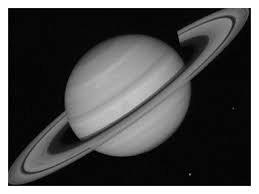

Digital Negative


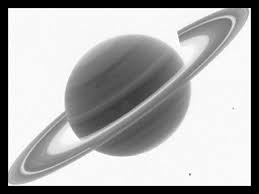

In [ ]:
generate_digital_negative(planet)

Original Image


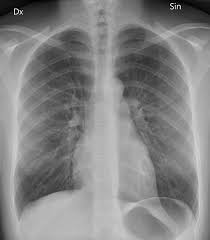

Digital Negative


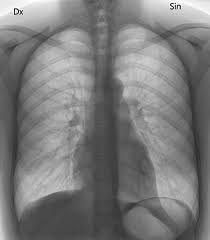

In [ ]:
generate_digital_negative(xray)

##

## 2) Bit Plane Slicing

Original Image


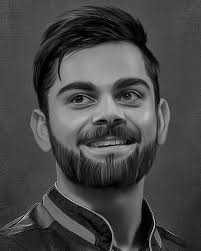

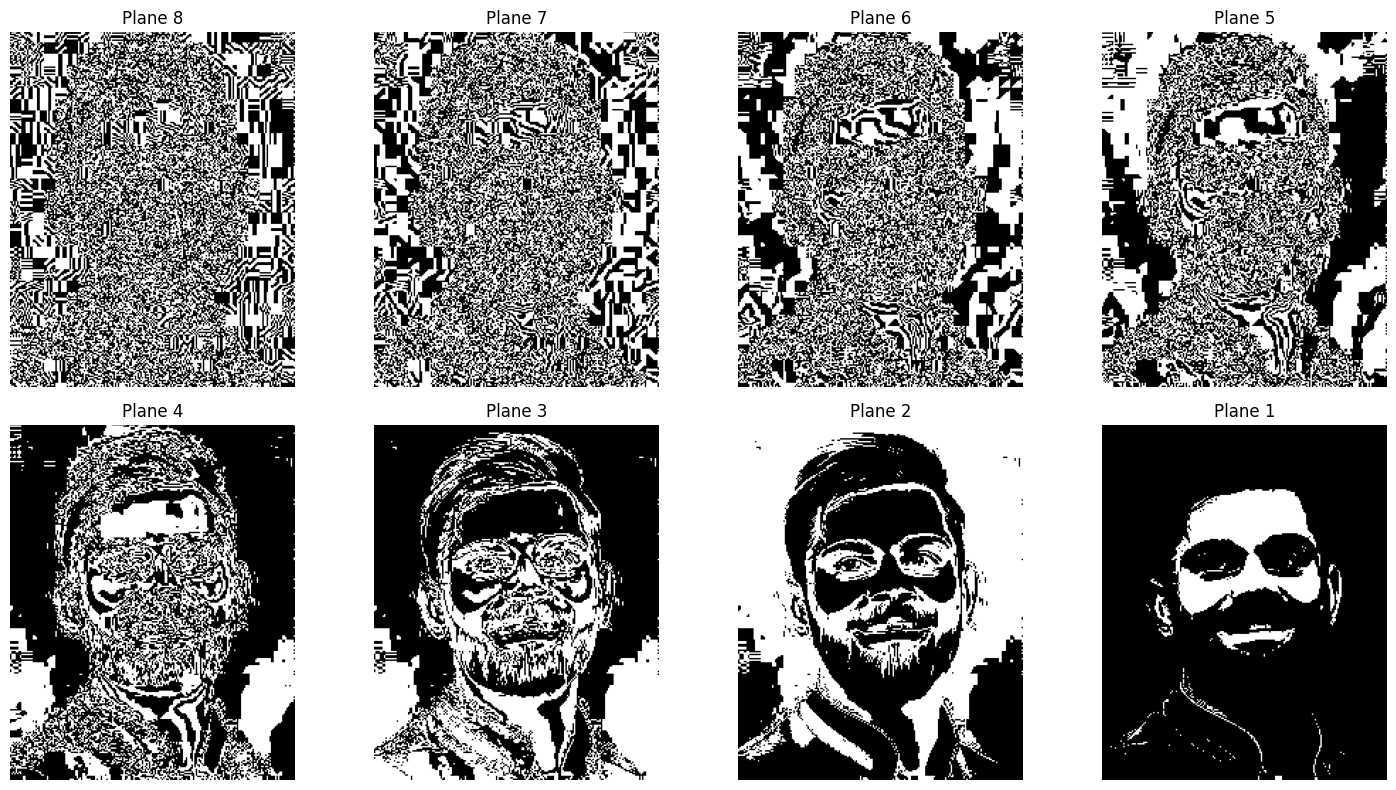

In [ ]:
img = cv2.imread('/content/kohli.jpg')
print('Original Image')
cv2_imshow(img)

[w, h, c] = img.shape
planes = 8
bit_planes = [np.zeros([w, h, 3], dtype=np.uint8) for _ in range(planes)]

def bitget(nbr, pos):
  return (nbr >> pos) & 1

for i in range(w):
  for j in range(h):
    for p in range(planes):
      bit_planes[p][i, j] = 255 * bitget(img[i, j, 0], p) # Process only the first channel for simplicity


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.ravel()

for i in range(planes):
    axes[i].imshow(bit_planes[i])
    axes[i].set_title(f"Plane {planes-i}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## 3) Gray Level Slicing

In [ ]:
planet = cv2.imread('/content/planet.jpg')

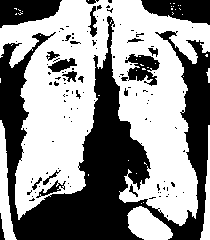

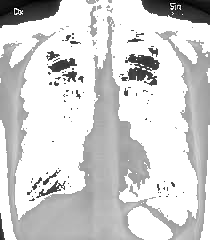

In [ ]:
# Without background
def gray_level_slicing_without_bg(img, a, b):
    img_copy = img.copy()
    rows, cols = img_copy.shape[:2]
    for i in range(rows):
        for j in range(cols):
            if a <= img_copy[i, j] <= b:
                img_copy[i, j] = 255
            else:
                img_copy[i, j] = 0
    return img_copy

# With background
def gray_level_slicing_with_bg(img, a, b):
    img_copy = img.copy()
    rows, cols = img_copy.shape[:2]
    for i in range(rows):
        for j in range(cols):
            if a <= img_copy[i, j] <= b:
                img_copy[i, j] = 255
    return img_copy


planet_gray = cv2.cvtColor(xray, cv2.COLOR_BGR2GRAY)
a = 74
b = 156

planet_gls_without_bg = gray_level_slicing_without_bg(planet_gray, a, b)
cv2_imshow(planet_gls_without_bg)


planet_gls_with_bg = gray_level_slicing_with_bg(planet_gray, a, b)
cv2_imshow(planet_gls_with_bg)